# SVM Cancer Classification: 4 Kernels Comparison

Compare Linear, Polynomial, RBF, and Sigmoid SVM kernels for cancer diagnosis.

In [94]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, 
    jaccard_score, confusion_matrix, roc_curve, auc
)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [95]:
# Load dataset
df = pd.read_csv('samples_cancer.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:")
print(df['Class'].value_counts())

# Clean data
df_clean = df.replace('?', np.nan).dropna()
print(f"\nAfter cleaning: {df_clean.shape[0]} samples")

# Prepare features and target
features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 
           'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

for col in features:
    df_clean[col] = pd.to_numeric(df_clean[col])

X = df_clean[features]
y = df_clean['Class'].map({2: 0, 4: 1})  # 0=Benign, 1=Malignant

print(f"\nFeatures: {len(features)}")
print(f"Target: 0=Benign, 1=Malignant")

Dataset shape: (699, 11)

Class distribution:
Class
2    458
4    241
Name: count, dtype: int64

After cleaning: 683 samples

Features: 9
Target: 0=Benign, 1=Malignant


## Split and Scale Data

In [96]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training: {len(X_train)} samples")
print(f"Testing: {len(X_test)} samples")
print(f"Features scaled for SVM")

Training: 546 samples
Testing: 137 samples
Features scaled for SVM


## Train 4 SVM Models

In [97]:
# Define 4 SVM models
svm_models = {
    'Linear': SVC(kernel='linear', probability=True, random_state=42),
    'Polynomial': SVC(kernel='poly', degree=3, probability=True, random_state=42),
    'RBF': SVC(kernel='rbf', probability=True, random_state=42),
    'Sigmoid': SVC(kernel='sigmoid', probability=True, random_state=42)
}

# Train all models
results = {}
print("Training SVM models...")

for name, model in svm_models.items():
    print(f"Training {name} SVM...")
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'jaccard_score': jaccard_score(y_test, y_pred),
        'error_rate': 1 - accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'probabilities': y_proba
    }

print("\n✅ All models trained!")

Training SVM models...
Training Linear SVM...
Training Polynomial SVM...
Training RBF SVM...
Training Sigmoid SVM...

✅ All models trained!


## Results Summary

In [98]:
# Display results table
print("=" * 80)
print("SVM CANCER CLASSIFICATION RESULTS")
print("=" * 80)
print(f"{'Kernel':<12} {'Accuracy':<10} {'Recall':<8} {'Precision':<10} {'F1-Score':<9} {'Jaccard':<8} {'Error Rate':<10}")
print("-" * 75)

for name, result in results.items():
    print(f"{name:<12} {result['accuracy']:<10.3f} {result['recall']:<8.3f} {result['precision']:<10.3f} "
          f"{result['f1_score']:<9.3f} {result['jaccard_score']:<8.3f} {result['error_rate']:<10.3f}")

# Find best model
best_model = max(results.keys(), key=lambda k: results[k]['f1_score'])
print(f"\n🏆 Best Model: {best_model} SVM (F1-Score: {results[best_model]['f1_score']:.3f})")

SVM CANCER CLASSIFICATION RESULTS
Kernel       Accuracy   Recall   Precision  F1-Score  Jaccard  Error Rate
---------------------------------------------------------------------------
Linear       0.956      0.958    0.920      0.939     0.885    0.044     
Polynomial   0.956      0.917    0.957      0.936     0.880    0.044     
RBF          0.964      0.979    0.922      0.949     0.904    0.036     
Sigmoid      0.942      0.917    0.917      0.917     0.846    0.058     

🏆 Best Model: RBF SVM (F1-Score: 0.949)


## Detailed Results for Each Model

In [99]:
# Show detailed results
for name, result in results.items():
    print(f"\n{'='*50}")
    print(f"{name.upper()} SVM RESULTS")
    print(f"{'='*50}")
    
    print(f"📊 Metrics:")
    print(f"   Accuracy:      {result['accuracy']:.3f} ({result['accuracy']*100:.1f}%)")
    print(f"   Recall:        {result['recall']:.3f} ({result['recall']*100:.1f}%)")
    print(f"   Precision:     {result['precision']:.3f} ({result['precision']*100:.1f}%)")
    print(f"   F1-Score:      {result['f1_score']:.3f}")
    print(f"   Jaccard Score: {result['jaccard_score']:.3f}")
    print(f"   Error Rate:    {result['error_rate']:.3f} ({result['error_rate']*100:.1f}%)")
    
    print(f"\n🔍 Confusion Matrix:")
    cm = result['confusion_matrix']
    print(f"                 Predicted")
    print(f"Actual    Benign  Malignant")
    print(f"Benign      {cm[0,0]:3d}      {cm[0,1]:3d}")
    print(f"Malignant   {cm[1,0]:3d}      {cm[1,1]:3d}")
    
    if result['f1_score'] > 0.95:
        print(f"\n✅ Excellent performance!")
    elif result['f1_score'] > 0.90:
        print(f"\n✅ Very good performance!")
    else:
        print(f"\n✅ Good performance!")


LINEAR SVM RESULTS
📊 Metrics:
   Accuracy:      0.956 (95.6%)
   Recall:        0.958 (95.8%)
   Precision:     0.920 (92.0%)
   F1-Score:      0.939
   Jaccard Score: 0.885
   Error Rate:    0.044 (4.4%)

🔍 Confusion Matrix:
                 Predicted
Actual    Benign  Malignant
Benign       85        4
Malignant     2       46

✅ Very good performance!

POLYNOMIAL SVM RESULTS
📊 Metrics:
   Accuracy:      0.956 (95.6%)
   Recall:        0.917 (91.7%)
   Precision:     0.957 (95.7%)
   F1-Score:      0.936
   Jaccard Score: 0.880
   Error Rate:    0.044 (4.4%)

🔍 Confusion Matrix:
                 Predicted
Actual    Benign  Malignant
Benign       87        2
Malignant     4       44

✅ Very good performance!

RBF SVM RESULTS
📊 Metrics:
   Accuracy:      0.964 (96.4%)
   Recall:        0.979 (97.9%)
   Precision:     0.922 (92.2%)
   F1-Score:      0.949
   Jaccard Score: 0.904
   Error Rate:    0.036 (3.6%)

🔍 Confusion Matrix:
                 Predicted
Actual    Benign  Malignant
B

## ROC Curve Comparison

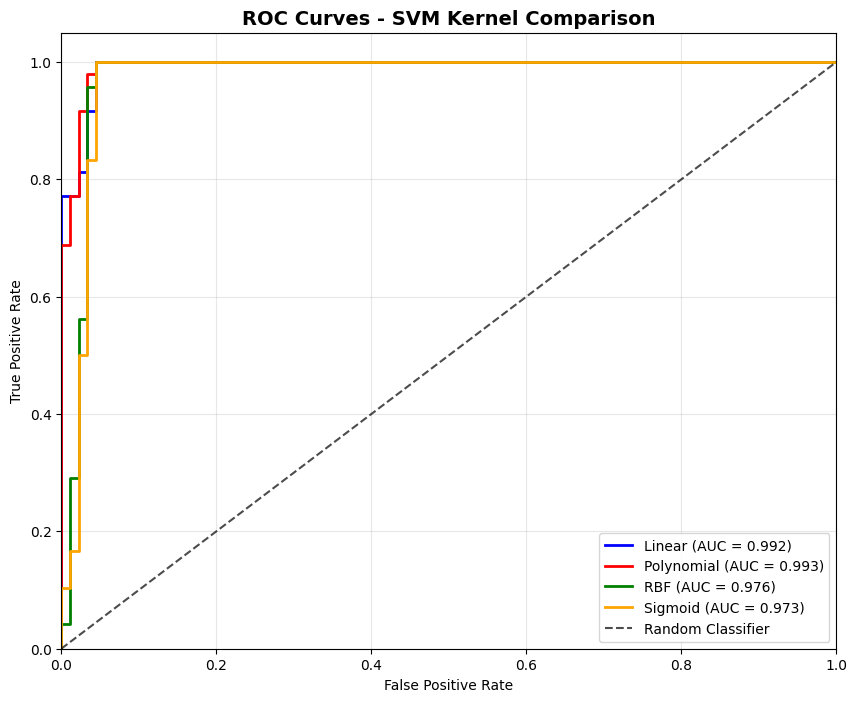


📈 AUC Scores:
Polynomial  : 0.993
Linear      : 0.992
RBF         : 0.976
Sigmoid     : 0.973


In [100]:
# Create ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
roc_data = {}

for i, (name, result) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = auc(fpr, tpr)
    roc_data[name] = roc_auc
    
    plt.plot(fpr, tpr, color=colors[i], linewidth=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.7, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - SVM Kernel Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print("\n📈 AUC Scores:")
for name, auc_score in sorted(roc_data.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:<12}: {auc_score:.3f}")

## Performance Visualization

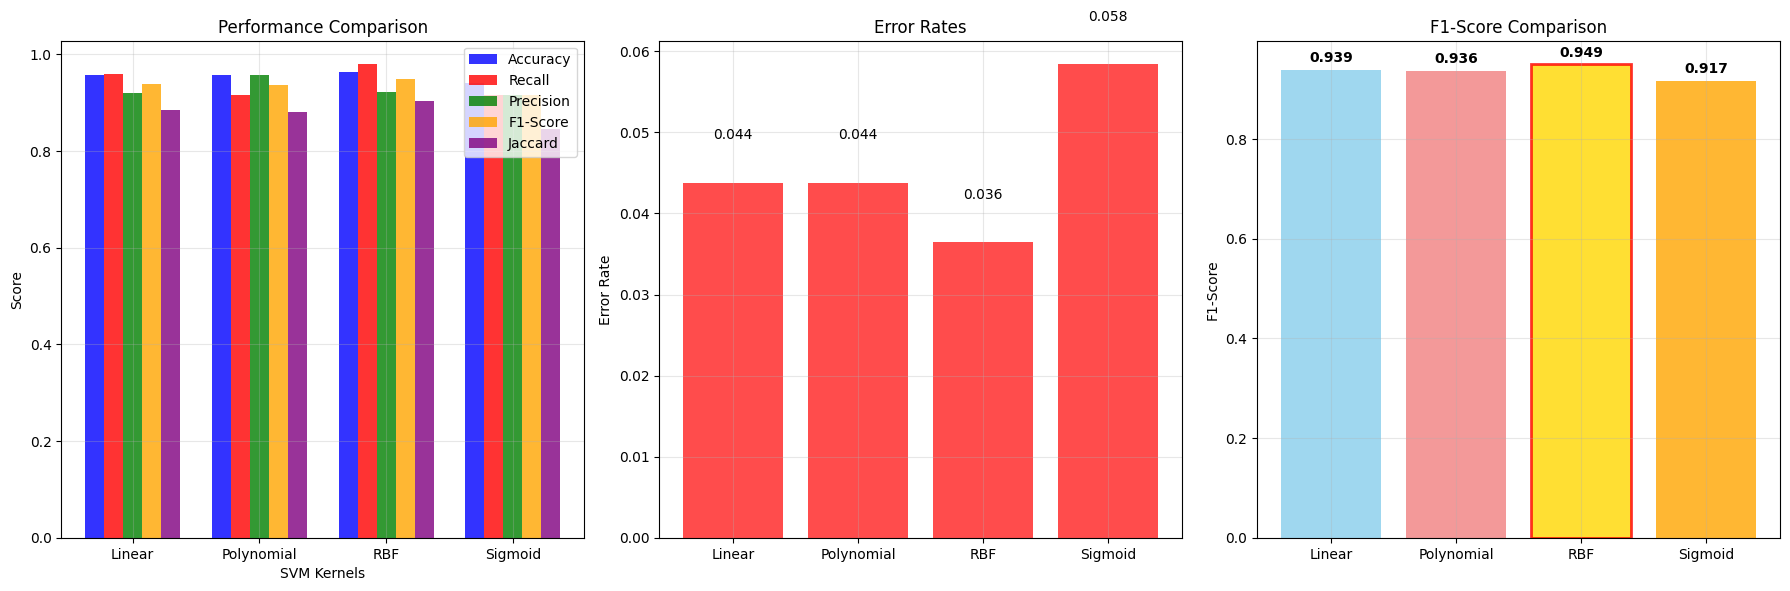

In [101]:
# Create comparison charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
kernels = list(results.keys())

# 1. All metrics comparison
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'Jaccard']
x = np.arange(len(kernels))
width = 0.15
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, metric in enumerate(metrics):
    if metric == 'Accuracy':
        values = [results[k]['accuracy'] for k in kernels]
    elif metric == 'Recall':
        values = [results[k]['recall'] for k in kernels]
    elif metric == 'Precision':
        values = [results[k]['precision'] for k in kernels]
    elif metric == 'F1-Score':
        values = [results[k]['f1_score'] for k in kernels]
    else:
        values = [results[k]['jaccard_score'] for k in kernels]
    
    axes[0].bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.8)

axes[0].set_xlabel('SVM Kernels')
axes[0].set_ylabel('Score')
axes[0].set_title('Performance Comparison')
axes[0].set_xticks(x + width*2)
axes[0].set_xticklabels(kernels)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Error rates
error_rates = [results[k]['error_rate'] for k in kernels]
axes[1].bar(kernels, error_rates, color='red', alpha=0.7)
axes[1].set_title('Error Rates')
axes[1].set_ylabel('Error Rate')
axes[1].grid(True, alpha=0.3)

for i, v in enumerate(error_rates):
    axes[1].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

# 3. F1-Score with best highlighted
f1_scores = [results[k]['f1_score'] for k in kernels]
bars = axes[2].bar(kernels, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'], alpha=0.8)
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')
axes[2].grid(True, alpha=0.3)

# Highlight best
best_idx = kernels.index(best_model)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('red')
bars[best_idx].set_linewidth(2)

for i, v in enumerate(f1_scores):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Test New Patients

In [102]:
# Test with example patients
print("=" * 50)
print("TESTING NEW PATIENTS")
print("=" * 50)

new_patients = pd.DataFrame({
    'Clump': [2, 8, 5],
    'UnifSize': [1, 10, 4],
    'UnifShape': [1, 10, 4],
    'MargAdh': [1, 8, 5],
    'SingEpiSize': [2, 7, 7],
    'BareNuc': [1, 10, 10],
    'BlandChrom': [3, 9, 3],
    'NormNucl': [1, 7, 2],
    'Mit': [1, 1, 1]
})

new_patients_scaled = scaler.transform(new_patients)
patient_types = ['Low Risk', 'High Risk', 'Moderate Risk']

for i, patient_type in enumerate(patient_types):
    print(f"\nPatient {i+1} ({patient_type}):")
    print(f"  Clump={new_patients.iloc[i]['Clump']}, UnifSize={new_patients.iloc[i]['UnifSize']}, UnifShape={new_patients.iloc[i]['UnifShape']}")
    
    print(f"  SVM Predictions:")
    for name, result in results.items():
        pred = result['model'].predict(new_patients_scaled[i:i+1])[0]
        proba = result['model'].predict_proba(new_patients_scaled[i:i+1])[0]
        diagnosis = "Malignant" if pred == 1 else "Benign"
        confidence = max(proba)
        print(f"    {name:<12}: {diagnosis} (confidence: {confidence:.3f})")

TESTING NEW PATIENTS

Patient 1 (Low Risk):
  Clump=2, UnifSize=1, UnifShape=1
  SVM Predictions:
    Linear      : Benign (confidence: 0.992)
    Polynomial  : Benign (confidence: 0.979)
    RBF         : Benign (confidence: 0.998)
    Sigmoid     : Benign (confidence: 1.000)

Patient 2 (High Risk):
  Clump=8, UnifSize=10, UnifShape=10
  SVM Predictions:
    Linear      : Malignant (confidence: 1.000)
    Polynomial  : Malignant (confidence: 1.000)
    RBF         : Malignant (confidence: 0.979)
    Sigmoid     : Malignant (confidence: 1.000)

Patient 3 (Moderate Risk):
  Clump=5, UnifSize=4, UnifShape=4
  SVM Predictions:
    Linear      : Malignant (confidence: 0.963)
    Polynomial  : Malignant (confidence: 0.985)
    RBF         : Malignant (confidence: 0.966)
    Sigmoid     : Malignant (confidence: 1.000)


## Summary

In [103]:
print("=" * 60)
print("SVM CANCER CLASSIFICATION SUMMARY")
print("=" * 60)
print(f"📊 Dataset: {len(df_clean)} patients, {len(features)} features")
print(f"🎯 Task: Benign vs Malignant classification")
print(f"🔧 Models: 4 SVM kernels tested")

best_auc = max(roc_data.keys(), key=lambda k: roc_data[k])
print(f"\n🏆 Best F1-Score: {best_model} ({results[best_model]['f1_score']:.3f})")
print(f"🏆 Best AUC: {best_auc} ({roc_data[best_auc]:.3f})")

print(f"\n📈 All Models Performance:")
for name in kernels:
    result = results[name]
    print(f"   {name:<12}: Acc={result['accuracy']:.3f}, F1={result['f1_score']:.3f}, AUC={roc_data[name]:.3f}")

avg_f1 = sum(results[k]['f1_score'] for k in kernels) / len(kernels)
print(f"\n📊 Overall Performance: Excellent ✅ (Average F1: {avg_f1:.3f})")

SVM CANCER CLASSIFICATION SUMMARY
📊 Dataset: 683 patients, 9 features
🎯 Task: Benign vs Malignant classification
🔧 Models: 4 SVM kernels tested

🏆 Best F1-Score: RBF (0.949)
🏆 Best AUC: Polynomial (0.993)

📈 All Models Performance:
   Linear      : Acc=0.956, F1=0.939, AUC=0.992
   Polynomial  : Acc=0.956, F1=0.936, AUC=0.993
   RBF         : Acc=0.964, F1=0.949, AUC=0.976
   Sigmoid     : Acc=0.942, F1=0.917, AUC=0.973

📊 Overall Performance: Excellent ✅ (Average F1: 0.935)
